In [43]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.model_selection import ParameterGrid


In [88]:
clean_data = pd.read_csv('new_df_womissing.csv')
clean_data

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...
230121,230121,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230122,230122,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230123,230123,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230124,230124,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [89]:
clean_data.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    223297
Third Party Name            6829
DateTime                       0
dtype: int64

In [90]:
clean_data = clean_data.drop(['Unnamed: 0', 'Third Party Account No'], axis=1)

In [91]:
data = clean_data.dropna()
data

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [92]:
df = pd.DataFrame(data)

zero_amount_df = df[df['Amount'] == 0]

zero_amount_df

,Account No,Balance,Amount,Third Party Name,DateTime
124060,950234174.0,776.302067,-0.0,Selfridges,2023-07-11 08:21:00
132525,738958551.0,5564.249325,-0.0,Amazon,2023-07-29 18:32:00
134237,730002588.0,12939.954627,-0.0,Fat Face,2023-07-31 17:42:00
146674,581655972.0,34362.247639,-0.0,Fitted Stitch,2023-08-15 05:45:00
168782,322221939.0,3186.856806,-0.0,Revella,2023-09-16 08:04:00
192920,912705941.0,17527.347189,-0.0,Tesco,2023-10-21 05:41:00
197774,520447032.0,7416.909870,-0.0,Lloyds Pharmacy,2023-10-30 09:22:00
212971,824916823.0,8591.033140,-0.0,Sainsbury Local,2023-11-16 05:47:00
219931,687135796.0,28698.757249,-0.0,Sainsbury,2023-11-29 07:29:00


In [93]:
df

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [94]:
data['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Frankie

In [95]:
holiday_data = {
    'date': ['2025-01-01', '2025-04-18', '2025-12-25', '2025-12-26', '2025-04-18', '2025-04-21', '2025-05-05', '2025-05-26', '2025-08-25'],
    'holiday': ['New Year\'s Day', 'Good Friday', 'Christmas Day', 'Boxing Day', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 'Spring bank holiday', 'Summer bank holiday']
}
df_holidays = pd.DataFrame(holiday_data)
df_holidays

,date,holiday
0,2025-01-01,New Year's Day
1,2025-04-18,Good Friday
2,2025-12-25,Christmas Day
3,2025-12-26,Boxing Day
4,2025-04-18,Good Friday
5,2025-04-21,Easter Monday
6,2025-05-05,Early May bank holiday
7,2025-05-26,Spring bank holiday
8,2025-08-25,Summer bank holiday


In [96]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['month_day'] = df_holidays['date'].dt.strftime('%m-%d')

data['DateTime'] = pd.to_datetime(data['DateTime'])
data['month_day'] = data['DateTime'].dt.strftime('%m-%d')

df_holidays = df_holidays.drop_duplicates(subset=['month_day'])

data['Holiday'] = data['month_day'].map(df_holidays.set_index('month_day')['holiday'])

data


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,NaN
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,NaN
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,NaN
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,NaN


In [97]:
data.fillna(False)

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [98]:
def check_holiday(holiday):
    if isinstance(holiday, str):
        return True
    else:
        return False

# Apply the function to the 'Holiday' column
data['Holiday'] = data['Holiday'].apply(check_holiday)

data


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [99]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


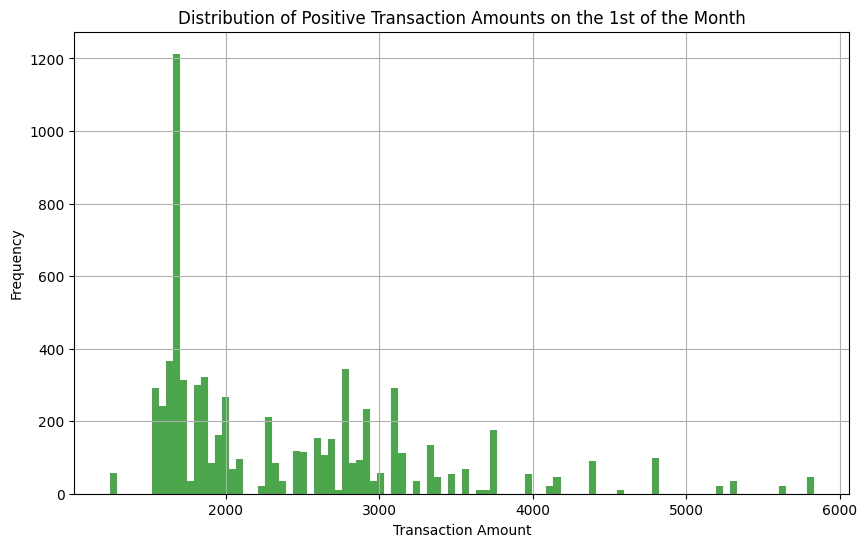

2300.0

In [100]:
# filter to consider only positive transaction amounts on the 1st as it potential to be salary
positive_transactions_on_first = data[data['Amount'] > 0]

# plot the distribution of positive transaction amounts on the 1st
plt.figure(figsize=(10, 6))
plt.hist(positive_transactions_on_first['Amount'], bins=100, color='green', alpha=0.7)
plt.title('Distribution of Positive Transaction Amounts on the 1st of the Month')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# calculate the 58th percentile of positive transaction amounts on the 1st as a potential threshold for salary identification
positive_threshold = positive_transactions_on_first['Amount'].quantile(0.58) # from graph of Don said 28,400 is med of income so i devined it into 12
positive_threshold


In [101]:
# filer data for transactions on the 1st day that are above the threshold
potential_salaries = data[(data['DateTime'].dt.day == 1) & (data['Amount'] > positive_threshold)]

# group by account and month to see if these transactions occur consistently
salary_by_account = potential_salaries.groupby('Account No').apply(lambda x: x['DateTime'].dt.month.unique())

consistent_salary_accounts = salary_by_account[salary_by_account.apply(len) >= 3]  # cutoff of at least 3 months

consistent_salary_accounts.head(), len(consistent_salary_accounts)


(Account No
 124125096.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 131388684.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 137822385.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 147474476.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 151968462.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 dtype: object,
 96)

In [102]:
# Correct the function to access the day attribute directly from the Timestamp object
salary_account_numbers = set(consistent_salary_accounts.index)
def flag_salary(row):
    if (row['Account No'] in salary_account_numbers) and (row['DateTime'].day == 1) and (row['Amount'] > positive_threshold):
        return True
    return False

# Apply the function to create the Is_Salary column
data['Is_Salary'] = data.apply(flag_salary, axis=1)

# Check results - displaying some flagged as True and some as False
data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].head(10), data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].tail(10)




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(     Account No   DateTime   Amount  Is_Salary
 0   678330503.0 2023-01-01  1584.00      False
 1   472213568.0 2023-01-01  1950.00      False
 4   624500124.0 2023-01-01  1825.00      False
 5   203466392.0 2023-01-01  2841.66       True
 6   768271776.0 2023-01-01  1950.00      False
 9   456221621.0 2023-01-01  1675.00      False
 10  350921975.0 2023-01-01  1842.50      False
 12  455831435.0 2023-01-01  1620.10      False
 15  832564361.0 2023-01-01  3542.00       True
 16  407574996.0 2023-01-01  1609.00      False,
          Account No            DateTime  Amount  Is_Salary
 230116  166019891.0 2023-12-06 20:39:00  -62.47      False
 230117  975345315.0 2023-12-06 20:40:00  -73.71      False
 230118  106601471.0 2023-12-06 20:43:00  -37.25      False
 230119  522188082.0 2023-12-06 20:48:00  -17.05      False
 230120  256002321.0 2023-12-06 20:50:00  -24.80      False
 230121  581655972.0 2023-12-06 20:54:00  -41.06      False
 230122  786141370.0 2023-12-06 20:55:00  -62.35   

In [103]:
data['Is_Salary'].sum()

1152

In [104]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [61]:
# data['DayofWeek'] = data['DateTime'].dt.weekday
# data['HourOfDay'] = data['DateTime'].dt.hour
# data['IsWeekend'] = data['DayofWeek'].isin([5, 6])

In [62]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [63]:
data = data[(data['Third Party Name'] != 'Halifax')]
data = data[data['Third Party Name'] != 'LBG']
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230124,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [64]:
# drop the original 'DateTime' column
data = data.drop(['DateTime'], axis=1)

X = data.drop(['Account No'], axis=1)
X



,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary
0,2971.000000,1584.00,Westport Care Home,01-01,True,False
1,3792.000000,1950.00,Barbiee Boutique,01-01,True,False
4,3226.000000,1825.00,Fat Face,01-01,True,False
5,4607.660000,2841.66,Lavender Primary,01-01,True,True
6,3620.000000,1950.00,A Cut Above,01-01,True,False
...,...,...,...,...,...,...
230121,45935.206861,-41.06,Tesco,12-06,False,False
230122,-244.837500,-62.35,Sainsbury Local,12-06,False,False
230123,9709.172159,-32.94,Deliveroo,12-06,False,False
230124,26834.165794,-19.25,Amazon,12-06,False,False


# With flag column

In [65]:
X = data.drop(['month_day'], axis=1)
X


,Account No,Balance,Amount,Third Party Name,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,True,False
...,...,...,...,...,...,...
230121,581655972.0,45935.206861,-41.06,Tesco,False,False
230122,786141370.0,-244.837500,-62.35,Sainsbury Local,False,False
230123,824916823.0,9709.172159,-32.94,Deliveroo,False,False
230124,366550080.0,26834.165794,-19.25,Amazon,False,False


In [66]:
X = X.drop(['Account No'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday,Is_Salary
0,2971.000000,1584.00,Westport Care Home,True,False
1,3792.000000,1950.00,Barbiee Boutique,True,False
4,3226.000000,1825.00,Fat Face,True,False
5,4607.660000,2841.66,Lavender Primary,True,True
6,3620.000000,1950.00,A Cut Above,True,False
...,...,...,...,...,...
230121,45935.206861,-41.06,Tesco,False,False
230122,-244.837500,-62.35,Sainsbury Local,False,False
230123,9709.172159,-32.94,Deliveroo,False,False
230124,26834.165794,-19.25,Amazon,False,False


In [67]:
RANDOM_STATE = 10
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
        ('scaler', StandardScaler(), ['Balance', 'Amount'])
    ],
    remainder='passthrough'
)


X_preprocessed = column_transformer.fit_transform(X)

X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)

In [68]:


# One-Class SVM parem
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

# find bes param
best_score = np.inf
best_params = None

for g in ParameterGrid(param_grid):
    model = OneClassSVM(**g)
    model.fit(X_train)
    scores = model.decision_function(X_val)
    score = -scores.mean()
    if score < best_score:
        best_score = score
        best_params = g

print("Best parameters:", best_params)

oc_svm_best = OneClassSVM(**best_params)


Best parameters: {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.1}


In [69]:
oc_svm_best.fit(X_preprocessed)

anomaly_scores = oc_svm_best.decision_function(X_preprocessed)


In [70]:
# anomaly_scores

In [71]:
anomaly_scores_df = pd.DataFrame(anomaly_scores, columns=['Anomaly Score'])

data.reset_index(drop=True, inplace=True)

# concatenate the anomaly scores with the original data
data_with_scores = pd.concat([data, anomaly_scores_df], axis=1)

print(data_with_scores.head())

    Account No  Balance   Amount    Third Party Name month_day  Holiday  \
0  678330503.0  2971.00  1584.00  Westport Care Home     01-01     True   
1  472213568.0  3792.00  1950.00    Barbiee Boutique     01-01     True   
2  624500124.0  3226.00  1825.00            Fat Face     01-01     True   
3  203466392.0  4607.66  2841.66    Lavender Primary     01-01     True   
4  768271776.0  3620.00  1950.00         A Cut Above     01-01     True   

   Is_Salary  Anomaly Score  
0      False     284.284942  
1      False    -263.113588  
2      False     105.062178  
3       True   -1803.496908  
4      False    -412.840929  


In [72]:
neg = data_with_scores[data_with_scores['Anomaly Score'] < 0]
neg


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-263.113588
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1803.496908
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False,-412.840929
6,350921975.0,2458.500000,1842.50,Brilliant Brushes,01-01,True,False,-929.002503
8,832564361.0,5376.000000,3542.00,Premier Finance,01-01,True,True,-2313.640944
...,...,...,...,...,...,...,...,...
216754,279149837.0,1237.281050,-146.10,Sainsbury,12-06,False,False,-191.980666
216771,858989281.0,30313.885119,-2.49,Loosely Fitted,12-06,False,False,-2718.154696
216781,975345315.0,40907.910578,-73.71,Tesco,12-06,False,False,-4979.709893
216785,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False,-5185.221587


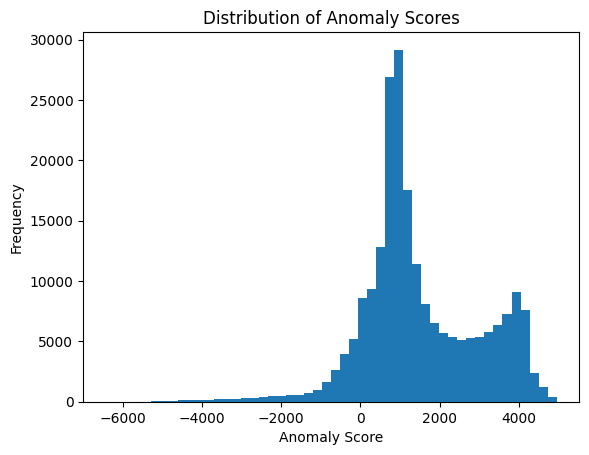

In [73]:
plt.hist(data_with_scores['Anomaly Score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


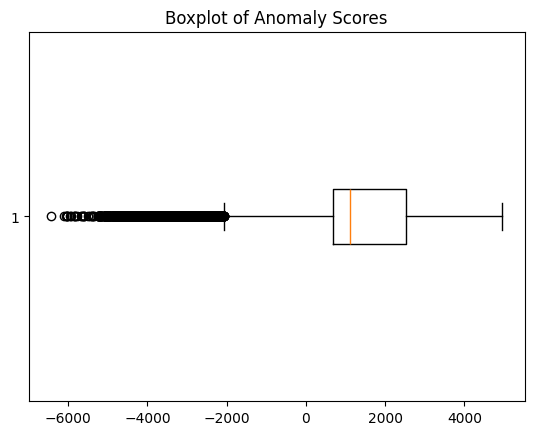

In [74]:
# Boxplot to view outliers
plt.boxplot(data_with_scores['Anomaly Score'], vert=False)
plt.title('Boxplot of Anomaly Scores')
plt.show()

In [75]:
# find threshold of anomaly scores
threshold = np.percentile(anomaly_scores, 0.17)
threshold


-4184.008704652094

In [76]:
# use threshold to identifind the anomaly behavior
data_with_scores['Is_Anomaly'] = anomaly_scores < threshold

data_with_scores


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,False,284.284942,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-263.113588,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,False,105.062178,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1803.496908,False
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False,-412.840929,False
...,...,...,...,...,...,...,...,...,...
216785,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False,-5185.221587,True
216786,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.984582,False
216787,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,False,3591.339325,False
216788,366550080.0,26834.165794,-19.25,Amazon,12-06,False,False,-2193.601867,False


In [77]:
# neg[neg['Account No']==581655972.0]

In [78]:
data_with_scores[data_with_scores['Is_Anomaly'] == True]

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
19258,822718326.0,2743.244447,3333.00,Boots,01-31,False,False,-4410.146574,True
19260,647472692.0,4316.963700,4779.00,University College Hospital,01-31,False,False,-4975.003894,True
19278,556992209.0,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,False,-4374.637740,True
19279,613729471.0,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,False,-4310.847782,True
19281,348325817.0,4077.009809,4167.00,Matalan,01-31,False,False,-4370.918696,True
...,...,...,...,...,...,...,...,...,...
216333,975345315.0,40981.620578,-15.11,Amazon,12-06,False,False,-4579.226338,True
216409,558119802.0,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,False,-4229.271938,True
216453,639409800.0,40441.725867,-9.20,Tesco,12-06,False,False,-4310.040855,True
216781,975345315.0,40907.910578,-73.71,Tesco,12-06,False,False,-4979.709893,True


In [105]:
clean_data = clean_data[['Account No', 'DateTime', 'Balance', 'Amount']]
clean_data


,Account No,DateTime,Balance,Amount
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00
2,472213568.0,2023-01-01 00:00:00,3012.000000,-780.00
3,283027736.0,2023-01-01 00:00:00,1787.000000,780.00
4,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00
...,...,...,...,...
230121,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06
230122,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35
230123,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94
230124,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25


In [82]:
data_with_scores

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,False,284.284942,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-263.113588,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,False,105.062178,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1803.496908,False
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False,-412.840929,False
...,...,...,...,...,...,...,...,...,...
216785,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False,-5185.221587,True
216786,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.984582,False
216787,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,False,3591.339325,False
216788,366550080.0,26834.165794,-19.25,Amazon,12-06,False,False,-2193.601867,False


In [110]:
data_with_scores = pd.merge(clean_data, data_with_scores, on=['Account No', 'Balance', 'Amount'], how='inner')
data_with_scores



,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,False,284.284942,False
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-263.113588,False
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,False,105.062178,False
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1803.496908,False
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,False,-412.840929,False
...,...,...,...,...,...,...,...,...,...,...
216785,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,False,-5185.221587,True
216786,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.984582,False
216787,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,False,3591.339325,False
216788,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,False,-2193.601867,False


In [112]:
data_with_scores['DateTime'] = pd.to_datetime(data_with_scores['DateTime'])
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,False,284.284942,False
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-263.113588,False
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,False,105.062178,False
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1803.496908,False
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,False,-412.840929,False
...,...,...,...,...,...,...,...,...,...,...
216785,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,False,-5185.221587,True
216786,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.984582,False
216787,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,False,3591.339325,False
216788,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,False,-2193.601867,False


In [113]:
data_with_scores['DayofWeek'] = data_with_scores['DateTime'].dt.weekday
data_with_scores['HourOfDay'] = data_with_scores['DateTime'].dt.hour
data_with_scores['IsWeekend'] = data_with_scores['DayofWeek'].isin([5, 6])

In [116]:
data_with_scores[data_with_scores['Is_Anomaly']==True]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
19258,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,False,-4410.146574,True,1,0,False
19260,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,False,-4975.003894,True,1,0,False
19278,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,False,-4374.637740,True,1,0,False
19279,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,False,-4310.847782,True,1,0,False
19281,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,False,-4370.918696,True,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216333,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,False,-4579.226338,True,2,5,False
216409,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,False,-4229.271938,True,2,7,False
216453,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,False,-4310.040855,True,2,8,False
216781,975345315.0,2023-12-06 20:40:00,40907.910578,-73.71,Tesco,12-06,False,False,-4979.709893,True,2,20,False


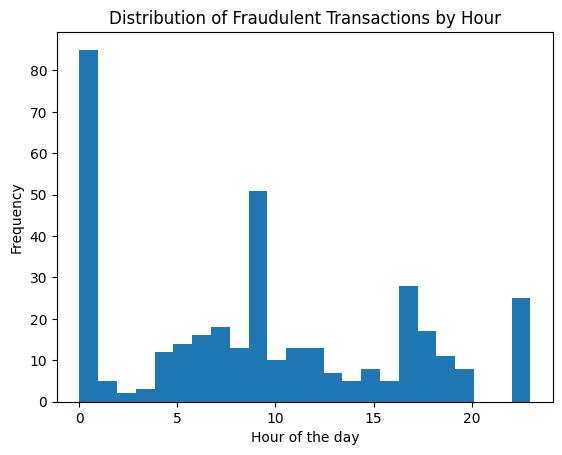

In [117]:
plt.hist(data_with_scores.loc[data_with_scores['Is_Anomaly'], 'HourOfDay'], bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()


In [118]:
flagged_df = data_with_scores[data_with_scores['Is_Anomaly']]

# Find the most common values for certain columns
common_third_party_names = flagged_df['Third Party Name'].value_counts()
common_days = flagged_df['DayofWeek'].value_counts()
common_hours = flagged_df['HourOfDay'].value_counts()
common_weekend_status = flagged_df['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)



Common Third Party Names in Flagged Transactions:
 Third Party Name
Tesco                          39
Lloyds Pharmacy                26
The Works                      22
Matalan                        19
Topshop                        19
CPA                            17
Coffee #1                      17
Loosely Fitted                 16
Amazon                         15
Sports Direct                  14
Boots                          12
Selfridges                     12
University College Hospital    12
Fitted Stitch                  11
Remedy plus care               10
Coop Local                      9
Sainsbury Local                 8
Netflix                         8
Starbucks                       8
PureGym                         7
Etsy                            7
Revella                         6
Fat Face                        6
Lavender Primary                5
Jollyes                         5
Five Senses Art                 5
AMAZON                          5
Sainsbury     

In [119]:
print("\nCommon Days of Week in Flagged Transactions:\n", common_days)
print("\nCommon Hours of Day in Flagged Transactions:\n", common_hours)
print("\nIs it Commonly on Weekends?:\n", common_weekend_status)


Common Days of Week in Flagged Transactions:
 DayofWeek
1    74
6    64
3    61
5    57
4    39
2    37
0    37
Name: count, dtype: int64

Common Hours of Day in Flagged Transactions:
 HourOfDay
0     85
9     51
17    28
23    25
7     18
18    17
6     16
5     14
11    13
12    13
8     13
4     12
19    11
10    10
20     8
15     8
13     7
1      5
14     5
16     5
3      3
2      2
Name: count, dtype: int64

Is it Commonly on Weekends?:
 IsWeekend
False    248
True     121
Name: count, dtype: int64


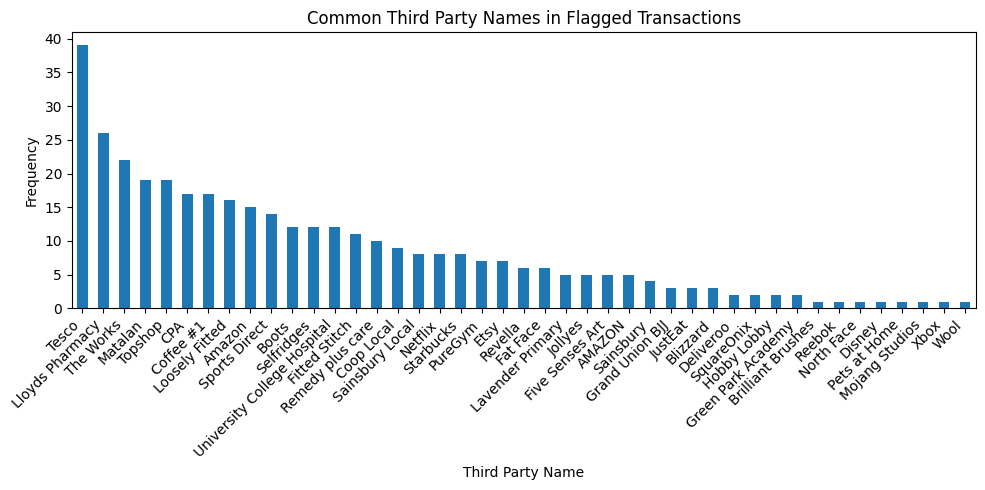

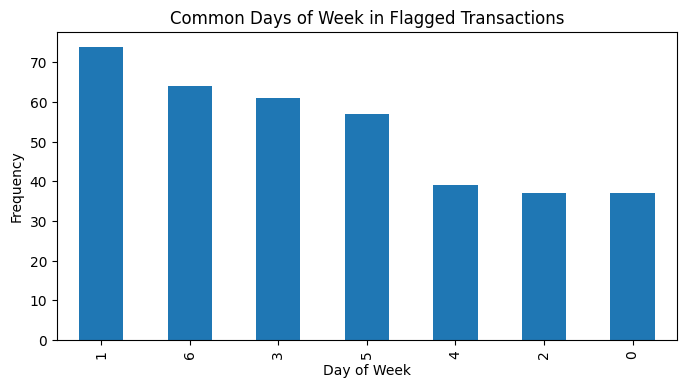

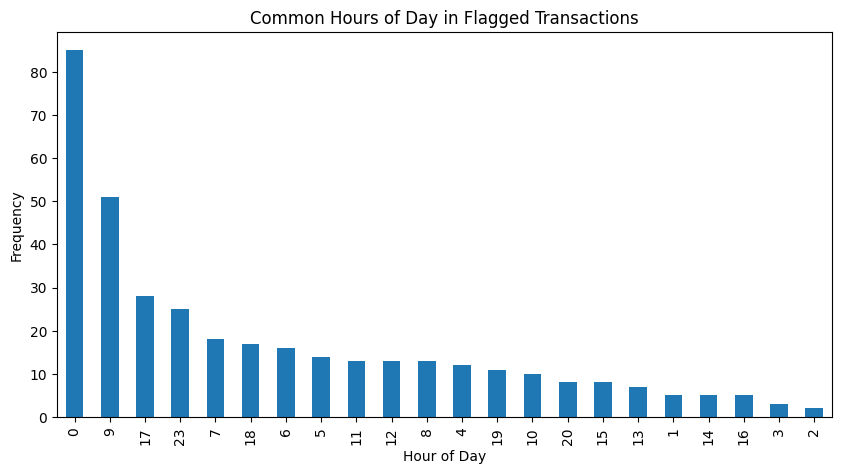

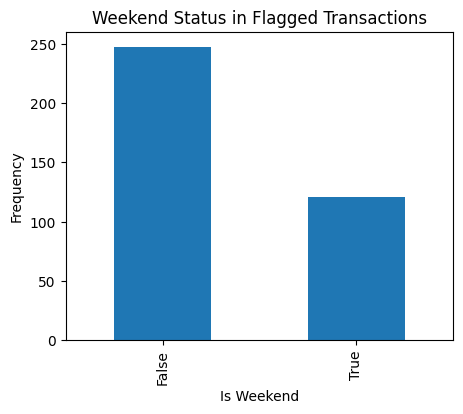

In [122]:
# Third Party Names
plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in Flagged Transactions')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()

# Days of the Week
plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Common Days of Week in Flagged Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

# Hours of Day
plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Common Hours of Day in Flagged Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

# Weekend Status
plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in Flagged Transactions')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()


In [121]:
# show stats of 'Third Party Name'
transaction_stats = flagged_df.groupby('Account No').agg({
    'Amount': ['mean', 'std', 'count', 'sum'],
    'Anomaly Score': ['mean', 'min', 'max']
}).reset_index()

transaction_stats


Account No       Amount                             Anomaly Score  \
                        mean         std count       sum          mean   
0   117273481.0  3376.000000         NaN     1   3376.00  -4474.787920   
1   121858569.0  3750.000000    0.000000     8  30000.00  -4488.939223   
2   133755851.0  3168.000000         NaN     1   3168.00  -4365.383811   
3   134847904.0  4119.000000    0.000000     2   8238.00  -4394.102523   
4   187111705.0  3333.330000         NaN     1   3333.33  -4537.009504   
5   188263947.0  3485.000000    0.000000     8  27880.00  -4605.633095   
6   256002321.0  3333.000000         NaN     1   3333.00  -4419.472719   
7   285220959.0  4779.000000         NaN     1   4779.00  -4436.823773   
8   314980178.0  3087.750000    0.000000     2   6175.50  -4309.760648   
9   315546581.0  -120.670000         NaN     1   -120.67  -4232.496167   
10  348325817.0  4167.000000         NaN     1   4167.00  -4370.918696   
11  366477356.0  3333.000000    0.000000     3   9999.00  -4424.468486   
12  383833857.0  4779.000000         NaN     1   4779.00  -4568.618527   
13  386729293.0  -177.405833   67.376064    12  -2128.87  -4634.778101   
14  424397946.0  3080.000000         NaN     1   3080.00  -4489.991747   
15  454129843.0  3080.000000         NaN     1   3080.00  -4256.980943   
16  480557476.0  3656.000000         NaN     1   3656.00  -4298.101228   
17  491392945.0  3087.750000         NaN     1   3087.75  -4369.174453   
18  503575533.0  3750.000000         NaN     1   3750.00  -4741.447719   
19  520239952.0  3125.000000    0.000000     8  25000.00  -4551.193166   
20  550169791.0  4779.000000         NaN     1   4779.00  -5245.920661   
21  554792076.0  4375.000000         NaN     1   4375.00  -5190.273004   
22  556992209.0  3333.000000         NaN     1   3333.00  -4374.637740   
23  558119802.0  -108.964000  106.165469    20  -2179.28  -4579.394609   
24  558875206.0  3125.000000         NaN     1   3125.00  -4703.310533   
25  581655972.0   -49.690000   59.278941   174  -8646.06  -4768.060457   
26  585133606.0  3750.000000         NaN     1   3750.00  -4524.988910   
27  593378953.0  3333.330000    0.000000     2   6666.66  -4389.269500   
28  611143859.0  3126.000000         NaN     1   3126.00  -4356.617952   
29  613729471.0  3333.000000         NaN     1   3333.00  -4310.847782   
30  616924659.0  2780.000000         NaN     1   2780.00  -4248.195004   
31  618514666.0  3750.000000         NaN     1   3750.00  -4616.732585   
32  639409800.0   -66.068158   71.140473    38  -2510.59  -4571.483214   
33  639549973.0  4375.000000    0.000000     3  13125.00  -4737.928836   
34  647472692.0  4779.000000         NaN     1   4779.00  -4975.003894   
35  657139925.0  3485.000000         NaN     1   3485.00  -4249.183666   
36  659415300.0  3750.000000         NaN     1   3750.00  -4317.179255   
37  660874296.0  3080.000000         NaN     1   3080.00  -4340.240964   
38  713910252.0  3080.000000    0.000000     4  12320.00  -4476.629066   
39  752362502.0  4375.000000         NaN     1   4375.00  -5054.406482   
40  779946617.0  4375.000000         NaN     1   4375.00  -4425.482685   
41  822718326.0  3333.000000         NaN     1   3333.00  -4410.146574   
42  854513972.0  3125.000000    0.000000     2   6250.00  -4215.223508   
43  880546403.0  2916.600000    0.000000     3   8749.80  -4341.076989   
44  920830317.0  3168.000000         NaN     1   3168.00  -4211.389709   
45  975345315.0    57.626500  940.225231    40   2305.06  -4619.909931   
46  986267641.0  3750.000000         NaN     1   3750.00  -4725.467413   
47  990461108.0  4119.000000    0.000000     9  37071.00  -4472.768935   

                              
            min          max  
0  -4474.787920 -4474.787920  
1  -5609.167081 -4190.618627  
2  -4365.383811 -4365.383811  
3  -4441.600306 -4346.604741  
4  -4537.009504 -4537.009504  
5  -5235.363829 -4258.174500  
6  -4419.472719 -4419.472719  
7  -4436.823773 -4436.823